In [1]:
import sympy as sp
from sympy import Eq, solve, symbols
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from matplotlib.transforms import Bbox



#——————————symbols——————————
x,y,n = symbols('x,y,n')


leader_canshu = 'rm11,cm11,r,f,r1,rm21,cm21,f1,rm12,cm12,r2,rm22,cm22,f2,q1'  
government_canshu = 'a,rg11,rg21,cg11,rg31,lg21,rg41,lg11,rg12,rg22,cg12,rg32,lg22,rg42,lg12,q2'

param_list1 = leader_canshu.split(',')
for param in param_list1:
    exec(f"{param}=sp.symbols('{param}')") 
    
    
param_list3 = government_canshu.split(',')
for param in param_list3:
    exec(f"{param}=sp.symbols('{param}')")  


#——————————payoff ——————————————————————————————————
##——————payoff when the environment=0——————————————————
w11 = rm11-cm11+r
w13 = (1-a)*(rg11+rg41-cg11)
w21 = rm11-cm11
w23 = rg21-lg21
w31 = rm21-cm21-f
w33 = (1-a)*(rg11+rg31-cg11)
w41 = rm21-cm21
w43 = -lg11-lg21

##——————payoff when the environment=1—————————————————— 
w111 = rm12-cm12+r
w113 = (1-a)*(rg12+rg42-cg12)
w211 = rm12-cm12
w213 = rg22-lg22
w311 = rm22-cm22-f
w313 = (1-a)*(rg12+rg32-cg12)
w411 = rm22-cm22
w413 = -lg12-lg22


#——————opinion leader——————————————
E_dpi = (1-n)*(y*w11+(1-y)*w21) + n*(y*w111+(1-y)*w211)
E_dni = (1-n)*(y*w31+(1-y)*w41) + n*(y*w311+(1-y)*w411)

#——————government——————————————
E_i = (1-n)*(x*w13+(1-x)*w33) + n*(x*w113+(1-x)*w313)
E_ni = (1-n)*(x*w23+(1-x)*w43) + n*(x*w213+(1-x)*w413)

#————————replication dynamic equation————————————
dx = x*(1-x)*(E_dpi-E_dni) 
dy = y*(1-y)*(E_i-E_ni)
dn = n*(1-n)*(q1*x-(1-x)+q2*y-(1-y)) #x,y,n


d:\anaconda\envs\emergency\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  # Remove the CWD from sys.path while we load stuff.


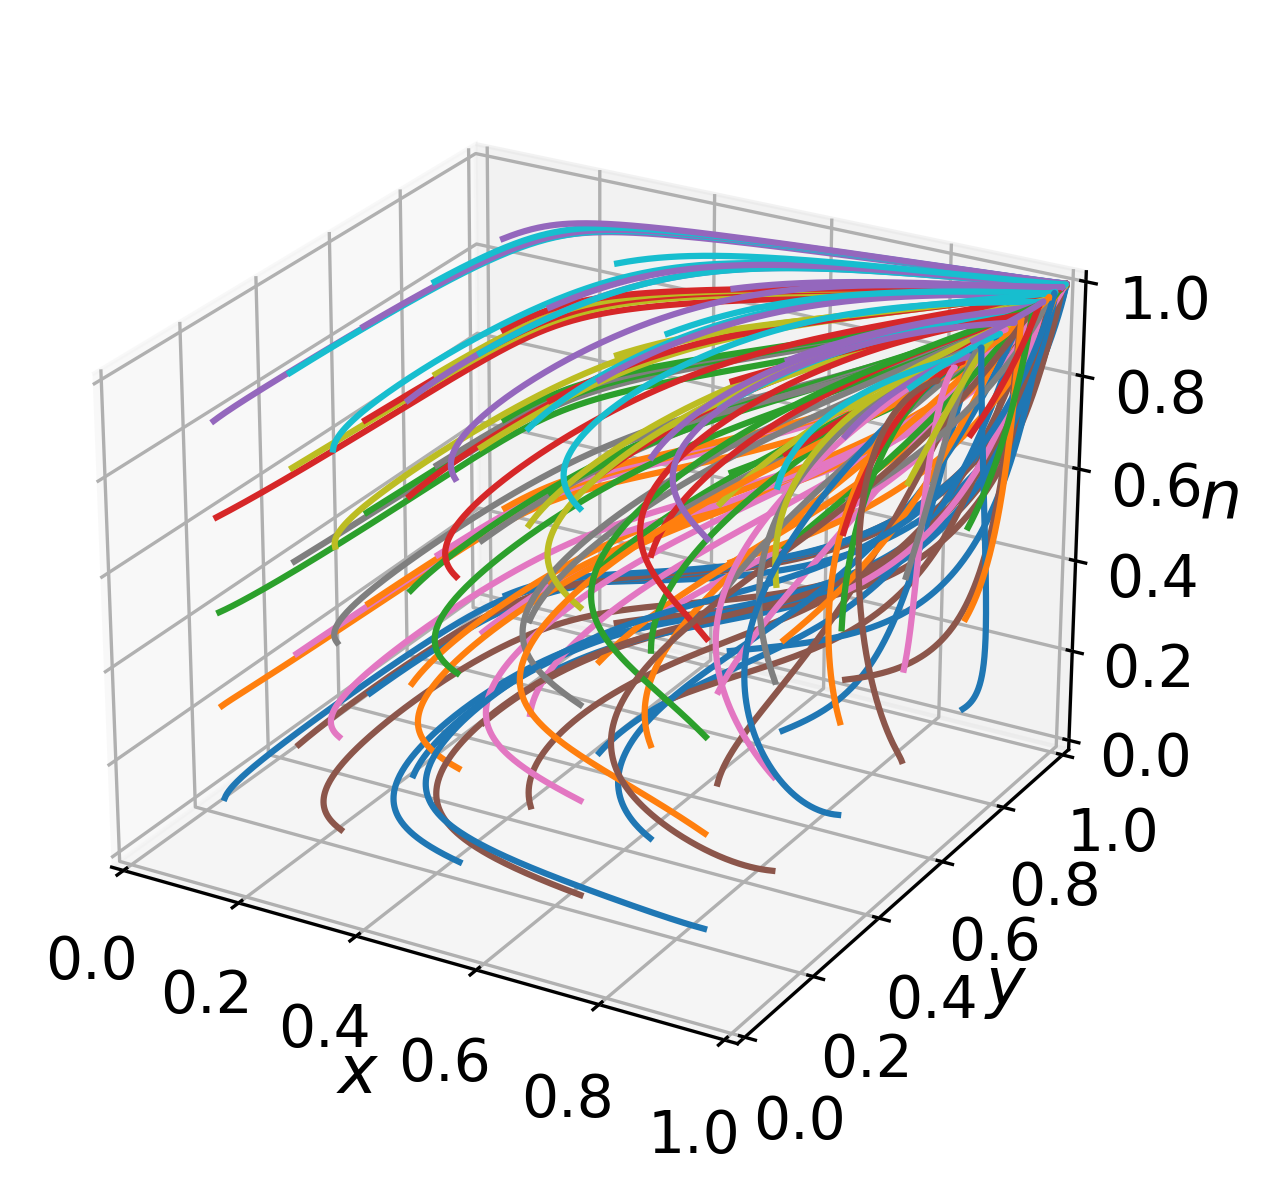

In [2]:
#————————the evolutionary dynamics of network public opinion under varying initial conditions.————————————

def public(Fx,t,rm11,cm11,rm21,cm21,r,f,rg11,cg11,rg41,rg31,rg21,lg21,lg11,a,rm12,cm12,rm22,cm22,rg12,cg12,rg42,rg32,rg22,lg22,lg12,q1,q2):
    x, y, n = Fx.tolist()
    return x*(1 - x)*(n*(-cm12 + cm22 + f*y + r*y + rm12 - rm22) + (1 - n)*(-cm11 + cm21 + f*y + r*y + rm11 - rm21)), \
           y*(1 - y)*(n*(lg12*(1 - x) + lg22 - rg22*x + rg32*(1 - a)*(1 - x) + rg42*x*(1 - a) + (1 - a)*(-cg12 + rg12)) + (1 - n)*(lg11*(1 - x) + lg21 - rg21*x + rg31*(1 - a)*(1 - x) + rg41*x*(1 - a) + (1 - a)*(-cg11 + rg11))), \
           n*(1 - n)*(q1*x + q2*y + x + y - 2)

fig=plt.figure(dpi=300)
ax=fig.gca(projection='3d')
t = np.arange(0, 50, 0.005) 
args=(3,0,7,0,2.4,5,3,18,2,3,2,10,6,0.2,4,0,6.8,0,2,20,3,4.2,3,15,9,2,2)

for i in np.arange(0.1,1,0.2):
    for j in np.arange(0.1,1,0.2):
        for k in np.arange(0.1,1,0.2):
            track11 = odeint(public, (i, j, k), t,args) 
            ax.plot(track11[:,0],track11[:,1],track11[:,2])

ax.view_init(elev=25)  
ax.set_facecolor('w')

ax.set_xlabel(r"$x$", labelpad=0, fontsize=16)
ax.set_ylabel(r"$y$", labelpad=0, fontsize=16)
ax.set_zlabel(r"$n$", labelpad=0, fontsize=16)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='z', labelsize=14)
# ======================

ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)

plt.show()


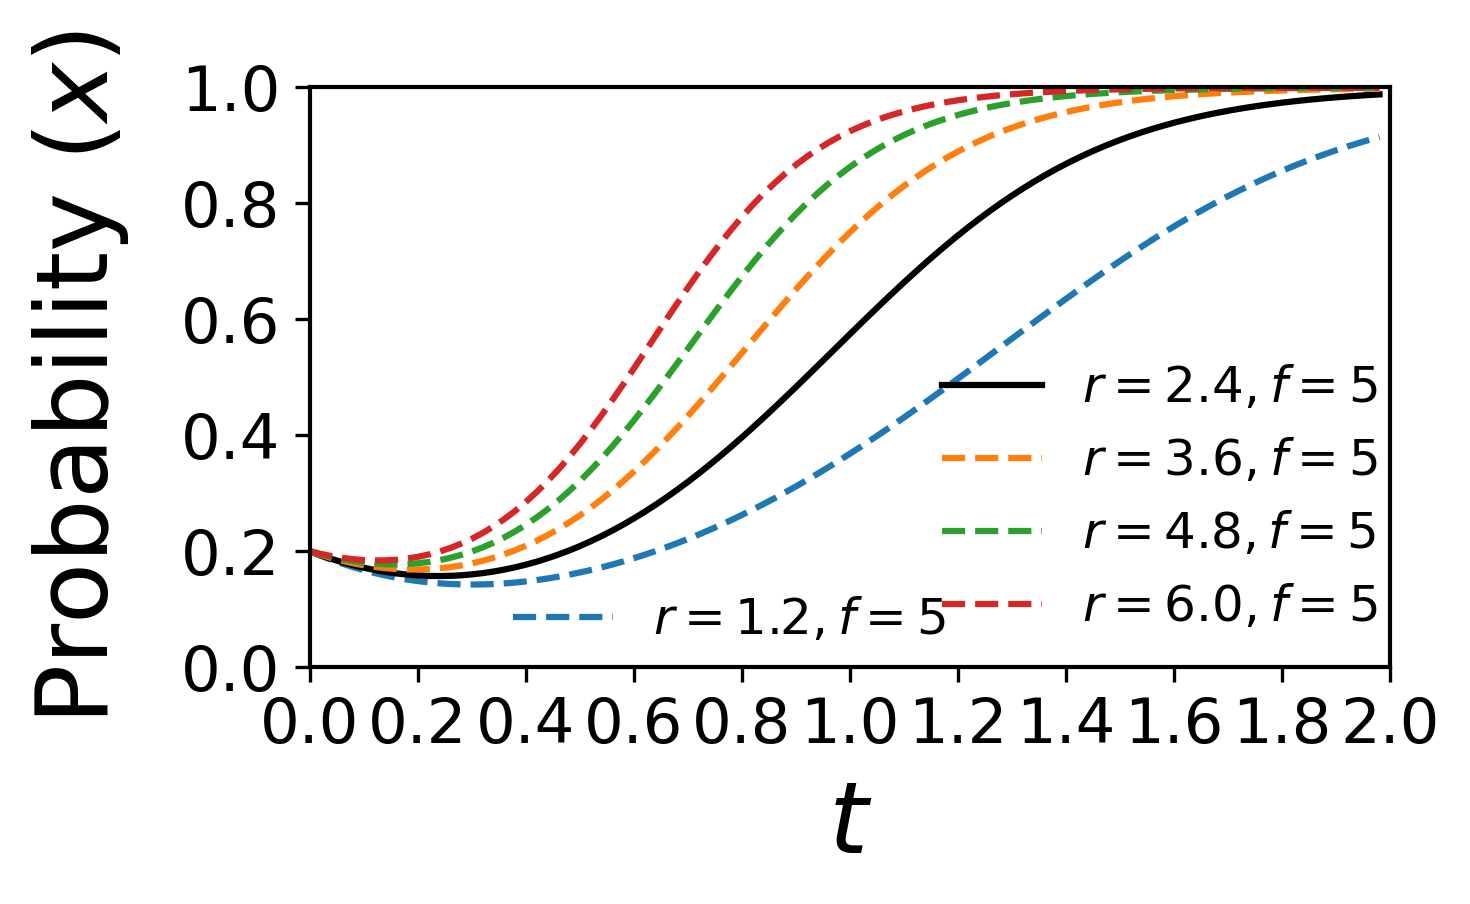

In [3]:
#———————— The impact of reward on influencers’ strategy————————————

t = np.arange(0, 2, 0.02)   

base_args = [3,0,7,0, 2.4, 5,3,18,2,3,2,10,6,0.2,4,0,6.8,0,2,20,3,4.2,3,15,9,2,2]
r_index = 4  


r_values = [1.2, 2.4, 3.6, 4.8, 6.0]

fig, ax = plt.subplots(figsize=(5, 3), dpi=300)


for r in r_values:
    args = base_args.copy()
    args[r_index] = r
    traj = odeint(public, (0.2, 0.2, 0.2), t, tuple(args))

  
    if r == 2.4:
        ax.plot(t,traj[:,0],color='black', linestyle='-', label=fr'$r={r},f=5$')
        
    else:
        ax.plot(t, traj[:, 0], linestyle='--', label=fr"$r={r}, f=5$") 

ax.set_xlabel(r"$t$", fontsize=24, labelpad=5)   
ax.set_ylabel(r"Probability $(x)$", fontsize=24, labelpad=12)


ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlim(0, 2)
ax.set_xticks(np.arange(0, 2.01, 0.2))

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.01, 0.2))

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(True)
    

handles, labels = ax.get_legend_handles_labels()

leg1 = ax.legend(handles[:1], labels[:1],
                 loc="upper right",
                 bbox_to_anchor=(0.63, 0.2),
                 frameon=False,
                 fontsize=12)

leg2 = ax.legend(handles[1:], labels[1:],
                 loc="upper right",
                 bbox_to_anchor=(1.03, 0.6),
                 frameon=False,
                 fontsize=12)

ax.add_artist(leg1)

fig.subplots_adjust(left=0.08, right=0.98, top=0.98, bottom=0.12)
fig.tight_layout()
        
for spine in ["left", "bottom", "right", "top"]:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color("black")
    ax.spines[spine].set_linewidth(1.0) 


ax.grid(False)

plt.tight_layout()
plt.show()

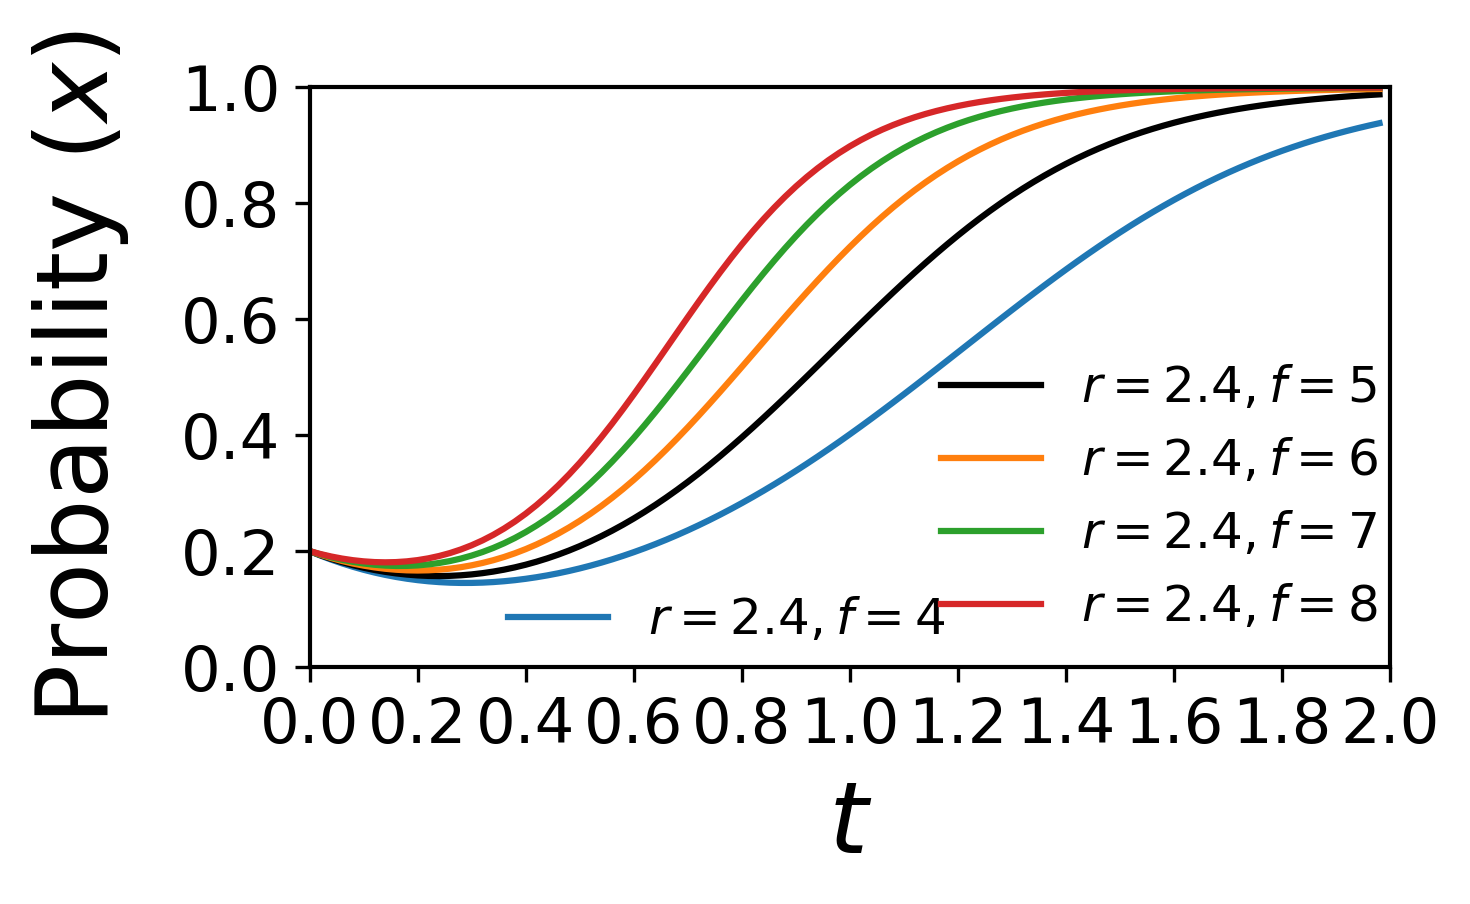

In [4]:
#———————— The impact of punishment on influencers’ strategy————————————


t = np.arange(0, 2, 0.02)  

base_args = [3,0,7,0, 2.4, 5,3,18,2,3,2,10,6,0.2,4,0,6.8,0,2,20,3,4.2,3,15,9,2,2]
f_index = 5  

f_values = [4,5, 6,7,8]


fig, ax = plt.subplots(figsize=(5, 3), dpi=300)

for f in f_values:
    args = base_args.copy()
    args[f_index] = f
    traj = odeint(public, (0.2, 0.2, 0.2), t, tuple(args))
    
    if f == 5:
        ax.plot(t, traj[:, 0], color='black',linestyle='-', label=fr"$r=2.4, f={f}$") 
    else:
        ax.plot(t, traj[:, 0], linestyle='-', label=fr"$r=2.4, f={f}$")  
        
ax.set_xlabel(r"$t$", fontsize=24, labelpad=5)   
ax.set_ylabel(r"Probability $(x)$", fontsize=24, labelpad=12)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlim(0, 2)
ax.set_xticks(np.arange(0, 2.01, 0.2))

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.01, 0.2))

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(True)



handles, labels = ax.get_legend_handles_labels()

leg1 = ax.legend(handles[:1], labels[:1],
                 loc="upper right",
                 bbox_to_anchor=(0.63, 0.2),
                 frameon=False,
                 fontsize=12)

leg2 = ax.legend(handles[1:], labels[1:],
                 loc="upper right",
                 bbox_to_anchor=(1.03, 0.6),
                 frameon=False,
                 fontsize=12)

ax.add_artist(leg1)

fig.subplots_adjust(left=0.08, right=0.98, top=0.98, bottom=0.12)
fig.tight_layout()        

for spine in ["left", "bottom", "right", "top"]:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color("black")
    ax.spines[spine].set_linewidth(1.0)  

plt.tight_layout()

plt.show()
